# Sutton 책 챕터 2.8

Figure 2.1 예제 (10-armed testbed) 에 대해 gradient bandits (ch 2.8) 을 구현

Question: gradient bandits 을 하면 optimal policy 가 1.0으로 수렴하는가?

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 예제 그림에 나온대로 어림하여 넣음
mean = np.array([0.2, -0.8, 1.5, 0.4, 1.2, -1.6, -0.2, -1.1, 0.8, -0.4])

In [3]:
mean

array([ 0.2, -0.8,  1.5,  0.4,  1.2, -1.6, -0.2, -1.1,  0.8, -0.4])

In [4]:
np.random.randn(10) + mean

array([-1.51066622,  0.27000444,  2.15270565, -1.05204115,  1.0553461 ,
       -1.86286236, -0.72597318,  0.73864357,  2.73526509, -1.37458381])

In [5]:
def get_reward():
    return np.random.randn(10) + mean

In [6]:
def softmax(H):
    h = H - np.max(H)
    exp = np.exp(h)
    return exp / np.sum(exp)

In [7]:
def gradient_bandit(N):
    H = np.zeros(10) # preference
    r_hist = []
    alpha = 0.1 # 적당히 잡음
    for t in range(1, N):
        policy = softmax(H) # policy pi
        # sampling (choice) action by policy
        a = np.random.choice(10, p=policy) 
        rewards = get_reward()
        r = rewards[a] # R_t (reward for chosen action)
        r_hist.append(r)
        avg_r = np.average(r_hist)
        # update a == A_t (chosen action)
        H[a] = H[a] + alpha*(r-avg_r)*(1-policy[a])
        # update a != A_t (non-chosen action)
        H[:a] = H[:a] - alpha*(r-avg_r)*policy[:a]
        H[a+1:] = H[a+1:] - alpha*(r-avg_r)*policy[a+1:]
    
    return softmax(H), r_hist

In [8]:
opt_policy, r_hist = gradient_bandit(10000)

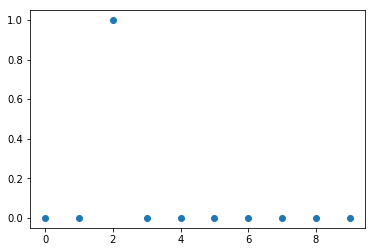

In [9]:
plt.plot(opt_policy, 'o')

In [10]:
for p in opt_policy:
    print "{:.2%}\t".format(p),

0.01%	0.01%	99.84%	0.02%	0.04%	0.01%	0.02%	0.01%	0.03%	0.01%	